In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#versions
# tensorflow 2.2.0 cudnn 7.6.5 cuda 10.1 python 3.8

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

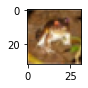

In [9]:
plot_sample(0)

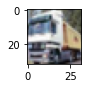

In [10]:
plot_sample(1)

In [11]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
cifar_classes[3]

'cat'

In [13]:
y_train[3]

array([4], dtype=uint8)

In [14]:
y_train[3][0]

4

In [15]:
cifar_classes[y_train[3][0]]

'deer'

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy' ,
             metrics = ['accuracy'] )

model.fit(X_train_scaled,y_train_categorical,epochs=50)


Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8124 - accuracy: 0.3539
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6230 - accuracy: 0.4283
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5406 - accuracy: 0.4578
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4819 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4291 - accuracy: 0.4972
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3876 - accuracy: 0.5143
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3484 - accuracy: 0.5250
Epoch 8/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3157 - accuracy: 0.5386
Epoch 9/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2809 - accuracy: 0.5504
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [27]:
cifar_classes[y_test[1][0]]

'ship'

In [28]:
cifar_classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [30]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
  ])

  model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy' ,
             metrics = ['accuracy'] )

  return model

In [31]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,1)

50000/50000 [==============================] - 1641s 33ms/step - loss: 1.9110 - accuracy: 0.3047
1 loop, best of 1: 27min 22s per loop


In [32]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled,y_train_categorical,1)

50000/50000 [==============================] - 256s 5ms/step - loss: 1.9156 - accuracy: 0.3037
1 loop, best of 1: 4min 23s per loop
